# Look at bathymetry made with Kaitlin's functions

In [16]:
import numpy as np
import xarray as xr
import sys  
sys.path.insert(0, '/home/users/birgal/')
from nemo_python import make_domain as md
from nemo_python import plots
import cartopy.crs as ccrs
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import cmocean

from shapely import geometry
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import pickle

In [4]:
import pyproj
from shapely.ops import transform
from multiprocessing import Process, Manager

#### Functions

In [5]:
def prepare_plot(figsize=(15, 15), dpi=300):
    """This function returns prepared axes for the polar plot.
    
    Usage:
        fig, ax = prepare_plot()
    """
    fig = plt.figure(figsize=figsize)
    ax = plt.axes(projection=ccrs.SouthPolarStereo())
    ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
    ax.set_boundary(map_circle, transform=ax.transAxes)
    # ax.coastlines(); 
    gl = ax.gridlines(draw_labels=True, ylocs=[]);#, color='w', lw=2);
    return fig, ax

In [6]:
theta = np.linspace(0, 2*np.pi, 100)
map_circle = mpath.Path(np.vstack([np.sin(theta), np.cos(theta)]).T * 0.5 + [0.5, 0.5])

#### Visualize grid

In [5]:
gridT     = xr.open_dataset('/home/users/birgal/data/NEMO-test3-20230914/eANT025.L121_1m_19790101_19791231_grid_T.nc')

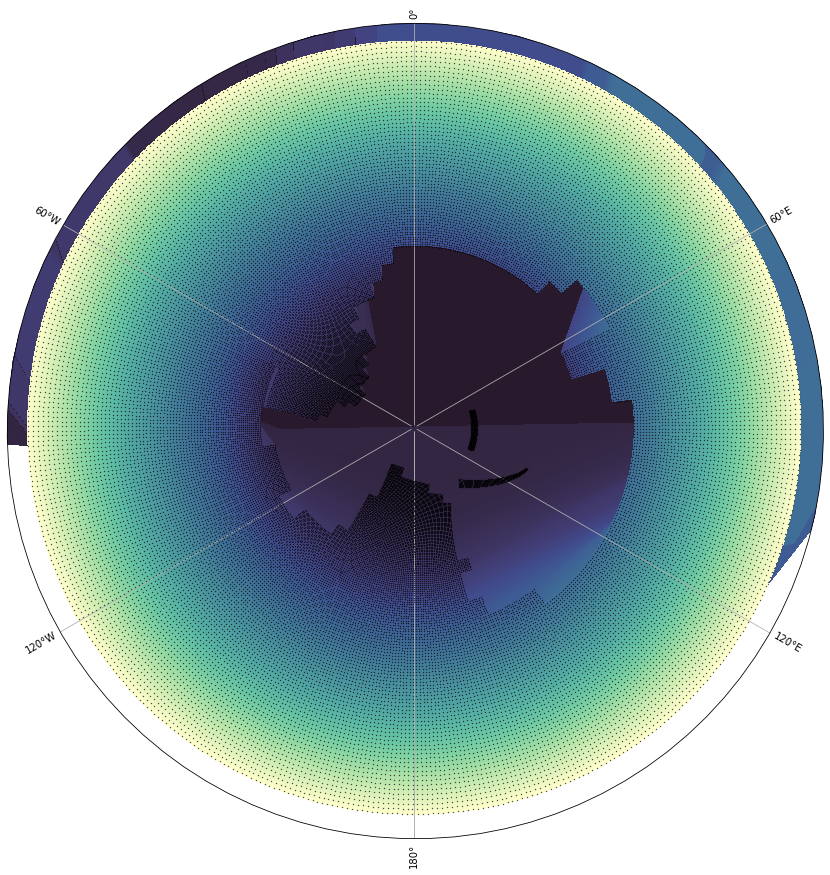

In [57]:
fig, ax = prepare_plot()
cm1 = ax.pcolormesh(gridT['nav_lon_grid_T'], gridT['nav_lat_grid_T'], gridT['area_grid_T'], 
                    transform=ccrs.PlateCarree(), cmap=cmocean.cm.deep_r);
cont1 = ax.scatter(gridT['nav_lon_grid_T'][::3,::3], 
                   gridT['nav_lat_grid_T'][::3,::3], 
                   zorder=3, transform=ccrs.PlateCarree(), s=0.1, c='k')

# CB = fig.colorbar(cm1, ax=ax, fraction=0.04)
# CB.add_lines(cont1)

### Steps 1-2

Kaitlin has done steps 1-2, with the below output files:

In [11]:
bed   = xr.open_dataset('/gws/nopw/j04/terrafirma/kaight/input_data/topo/BedMachineAntarctica-v3.nc')
coord = xr.open_dataset('/home/users/birgal/coordinates_AIS.nc').squeeze()
BedMachine = xr.open_dataset('/home/users/birgal/eORCA025_BedMachine3_AIS.nc')
IBCSO = xr.open_dataset('/home/users/birgal/data/input_data/topo/IBCSO_v2_bed_WGS84.nc')

Visualize bathymetry in this step:

In [7]:
x1 = np.ma.masked_where(coord['nav_lon'][0:453,:] < 0, coord['nav_lon'][0:453,:])
y1 = np.ma.masked_where(coord['nav_lon'][0:453,:] < 0, coord['nav_lat'][0:453,:])
z1 = np.ma.masked_where(coord['nav_lon'][0:453,:] < 0, BedMachine['bathy'][0:453,:])

x2 = np.ma.masked_where(coord['nav_lon'][0:453,:] >= 0, coord['nav_lon'][0:453,:])
y2 = np.ma.masked_where(coord['nav_lon'][0:453,:] >= 0, coord['nav_lat'][0:453,:])
z2 = np.ma.masked_where(coord['nav_lon'][0:453,:] >= 0, BedMachine['bathy'][0:453,:])

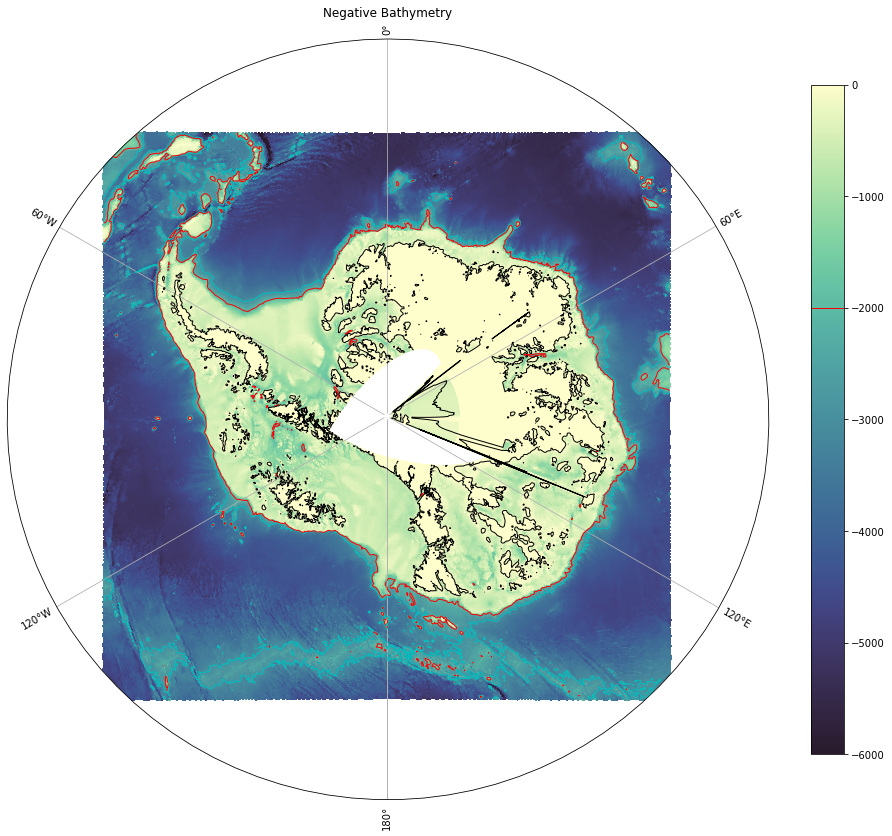

In [8]:
fig, ax = prepare_plot()
cm1 = ax.pcolormesh(coord['nav_lon'][0:453,:], 
                    coord['nav_lat'][0:453,:], 
                    BedMachine['bathy'], 
                    transform=ccrs.PlateCarree(), vmin=-6000, vmax=0, cmap=cmocean.cm.deep_r);

ax.set_title('Negative Bathymetry');
cont1 = ax.contour(x1, y1, z1, levels=[-3000], colors='c', linestyles='-', linewidths=1, zorder=4, transform=ccrs.PlateCarree())
cont2 = ax.contour(x2, y2, z2, levels=[-3000], colors='c', linestyles='-', linewidths=1, zorder=4, transform=ccrs.PlateCarree())
cont1 = ax.contour(x1, y1, z1, levels=[-2000], colors='r', linestyles='-', linewidths=1, zorder=4, transform=ccrs.PlateCarree())
cont2 = ax.contour(x2, y2, z2, levels=[-2000], colors='r', linestyles='-', linewidths=1, zorder=4, transform=ccrs.PlateCarree())
cont3 = ax.contour(x1, y1, z1, levels=[0], colors='k', linestyles='-', linewidths=1, zorder=4, transform=ccrs.PlateCarree())
cont4 = ax.contour(x2, y2, z2, levels=[0], colors='k', linestyles='-', linewidths=1, zorder=4, transform=ccrs.PlateCarree())

CB = fig.colorbar(cm1, ax=ax, fraction=0.04)
CB.add_lines(cont1)

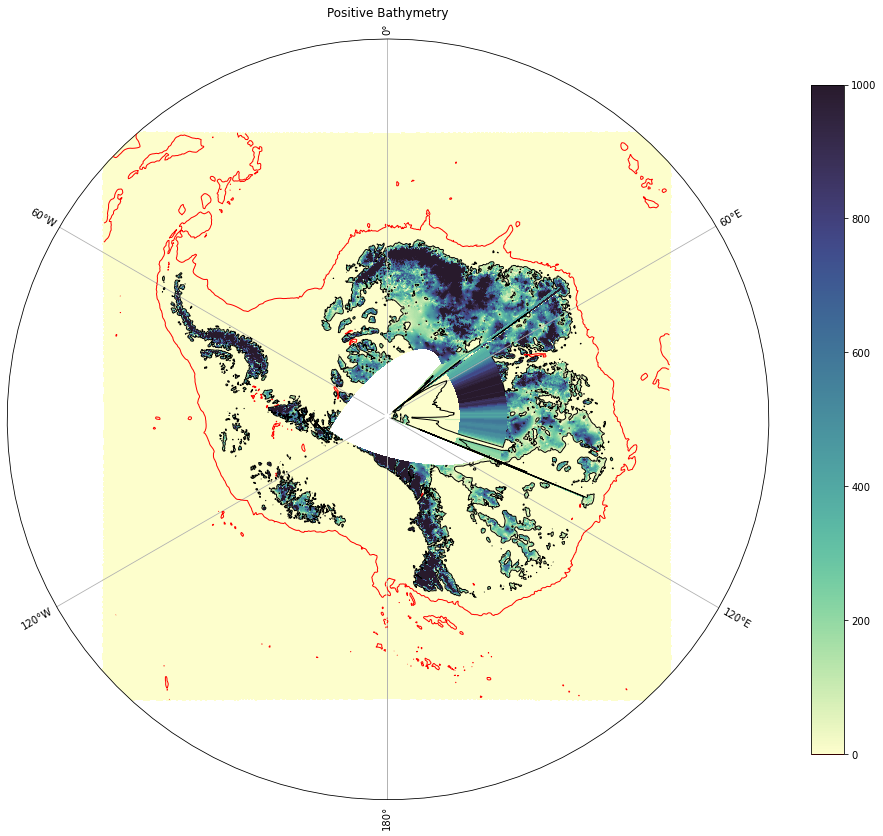

In [9]:
fig, ax = prepare_plot()
cm1 = ax.pcolormesh(coord['nav_lon'][0:453,:], 
                    coord['nav_lat'][0:453,:], 
                    BedMachine['bathy'], 
                    transform=ccrs.PlateCarree(), vmin=0, vmax=1000, cmap=cmocean.cm.deep);

ax.set_title('Positive Bathymetry');
cont1 = ax.contour(x1, y1, z1, levels=[-2000], colors='r', linestyles='-', linewidths=1, zorder=4, transform=ccrs.PlateCarree())
cont2 = ax.contour(x2, y2, z2, levels=[-2000], colors='r', linestyles='-', linewidths=1, zorder=4, transform=ccrs.PlateCarree())
cont3 = ax.contour(x1, y1, z1, levels=[0], colors='k', linestyles='-', linewidths=1, zorder=4, transform=ccrs.PlateCarree())
cont4 = ax.contour(x2, y2, z2, levels=[0], colors='k', linestyles='-', linewidths=1, zorder=4, transform=ccrs.PlateCarree())

CB = fig.colorbar(cm1, ax=ax, fraction=0.04)
CB.add_lines(cont1)

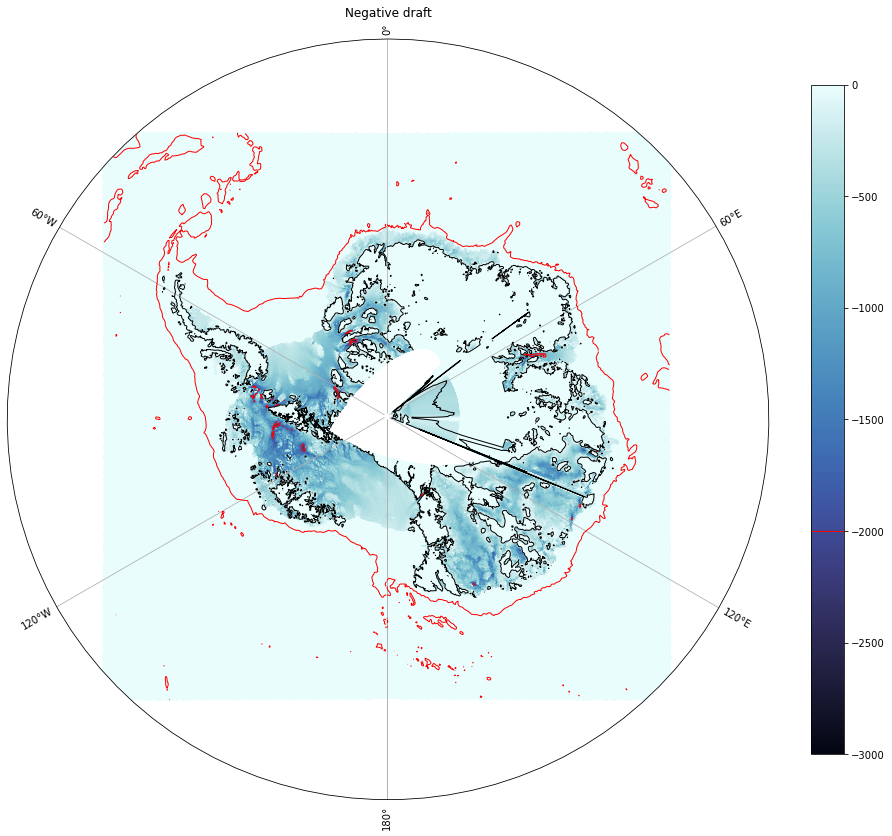

In [10]:
fig, ax = prepare_plot()
cm1 = ax.pcolormesh(coord['nav_lon'][0:453,:], 
                    coord['nav_lat'][0:453,:], 
                    BedMachine['draft'], 
                    transform=ccrs.PlateCarree(), vmin=-3000, vmax=0, cmap=cmocean.cm.ice);

ax.set_title('Negative draft');
cont1 = ax.contour(x1, y1, z1, levels=[-2000], colors='r', linestyles='-', linewidths=1, zorder=4, transform=ccrs.PlateCarree())
cont2 = ax.contour(x2, y2, z2, levels=[-2000], colors='r', linestyles='-', linewidths=1, zorder=4, transform=ccrs.PlateCarree())
cont3 = ax.contour(x1, y1, z1, levels=[0], colors='k', linestyles='-', linewidths=1, zorder=4, transform=ccrs.PlateCarree())
cont4 = ax.contour(x2, y2, z2, levels=[0], colors='k', linestyles='-', linewidths=1, zorder=4, transform=ccrs.PlateCarree())

CB = fig.colorbar(cm1, ax=ax, fraction=0.04)
CB.add_lines(cont1)

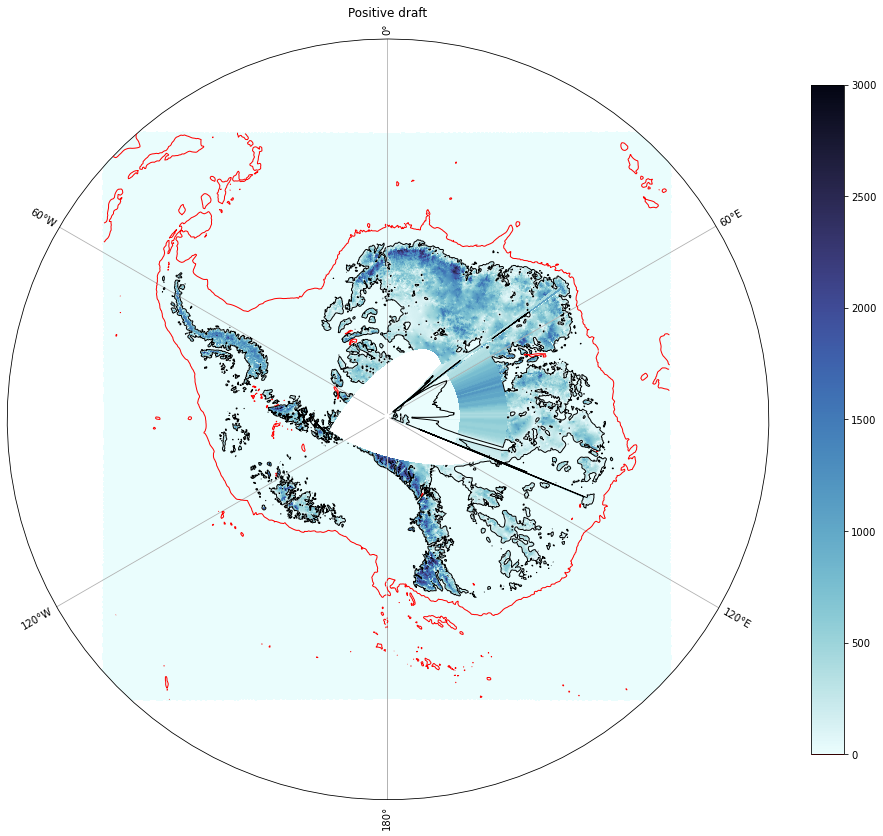

In [11]:
fig, ax = prepare_plot()
cm1 = ax.pcolormesh(coord['nav_lon'][0:453,:], 
                    coord['nav_lat'][0:453,:], 
                    BedMachine['draft'], 
                    transform=ccrs.PlateCarree(), vmin=0, vmax=3000, cmap=cmocean.cm.ice_r);

ax.set_title('Positive draft');
cont1 = ax.contour(x1, y1, z1, levels=[-2000], colors='r', linestyles='-', linewidths=1, zorder=4, transform=ccrs.PlateCarree())
cont2 = ax.contour(x2, y2, z2, levels=[-2000], colors='r', linestyles='-', linewidths=1, zorder=4, transform=ccrs.PlateCarree())
cont3 = ax.contour(x1, y1, z1, levels=[0], colors='k', linestyles='-', linewidths=1, zorder=4, transform=ccrs.PlateCarree())
cont4 = ax.contour(x2, y2, z2, levels=[0], colors='k', linestyles='-', linewidths=1, zorder=4, transform=ccrs.PlateCarree())

CB = fig.colorbar(cm1, ax=ax, fraction=0.04)
CB.add_lines(cont1)

### Step 3

Options for combining the bathymetry from multiple underlying datasets (BedMachine, GEBCO, IBCSO):
- Fill Antarctic continent area with BedMachine, splice GEBCO or IBCSO into remainder of domain, and apply some sort of transition at edges
- Fill Antarctic continent area with BedMachine up until the 2000 m isobath, fill with GEBCO or IBCSO outside that with minimal transition at edges:
        - Variations: IBCSO v1 versus v2, or GEBCO (BedMachine uses IBCSOv1)
- Some other choice of isobath to separate at
- Use some sort of background weighting scheme that merges the different datasets (like those used by IBCSO and BedMachine)

What I need to be able to compare the bathymetry that results from these different methods:
- Files of BedMachine, GEBCO, IBCSO (v1 and v2) each interpolated over the NEMO domain
- Plus versions of bathymetry resulting from the options described above

BedMachine uses the minimum curvature algorithm to combine datasets, I think. Supplement. info: https://static-content.springer.com/esm/art%3A10.1038%2Fs41561-019-0510-8/MediaObjects/41561_2019_510_MOESM1_ESM.pdf
IBSCOv2 uses continuous curvature spline in tension. Background and high-quality grids are combined using the bending algorithm from Arndt et al. (https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/grl.50413)

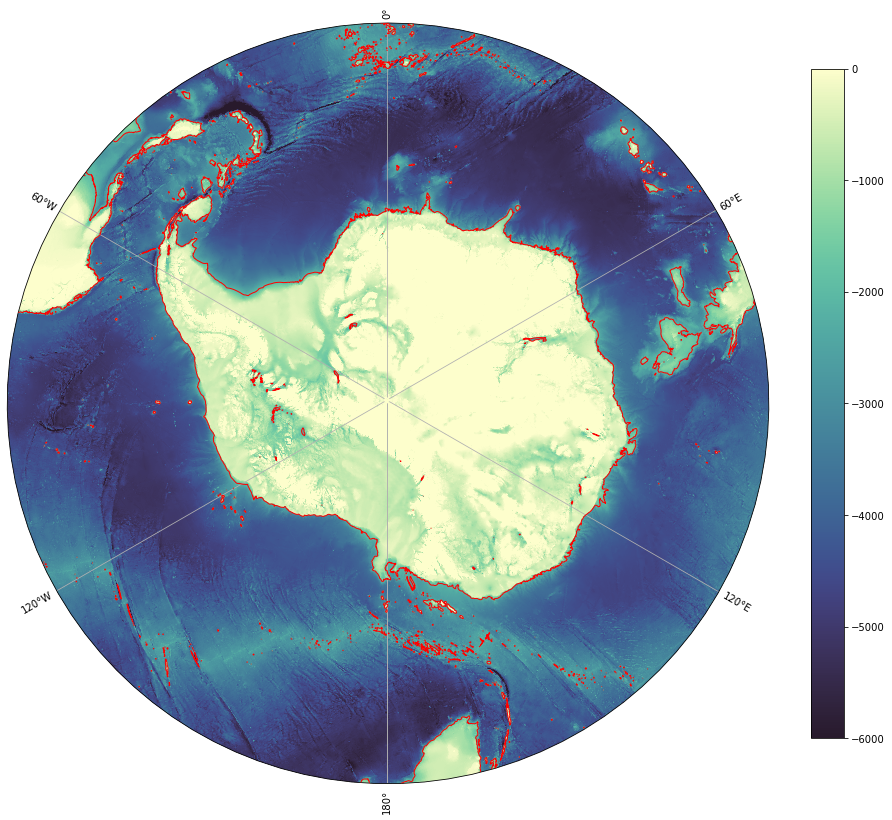

In [17]:
fig, ax = prepare_plot()
cm1 = ax.pcolormesh(IBCSO['lon'][::10], 
                    IBCSO['lat'][::5],
                    IBCSO['z'][::5,::10], 
                    transform=ccrs.PlateCarree(), vmin=-6000, vmax=0, cmap=cmocean.cm.deep_r);

x, y = np.meshgrid(IBCSO['lon'], IBCSO['lat'])
cs = ax.contour(x, y, IBCSO['z'], levels=[-2000], colors='r', linestyles='-', linewidths=1, zorder=4, transform=ccrs.PlateCarree())

CB = fig.colorbar(cm1, ax=ax, fraction=0.04)
# CB.add_lines(cont1)

##### Make polygon of 2000 m isobath to separate domain:

In [18]:
# Create largest polygon based on 2000 m contour line (excluding holes)
for ncp, cp in enumerate(cs.collections[0].get_paths()[0].to_polygons()):
    isobath_2000m = geometry.Polygon([(i[0], i[1]) for i in zip(cp[:,0],cp[:,1])])

In [31]:
x_iso, y_iso = isobath_2000m.exterior.xy
x_iso1 = np.ma.masked_where(np.array(x_iso) < 0, np.array(x_iso))
y_iso1 = np.ma.masked_where(np.array(x_iso) < 0, np.array(y_iso))
x_iso2 = np.ma.masked_where(np.array(x_iso) >= 0, np.array(x_iso))
y_iso2 = np.ma.masked_where(np.array(x_iso) >= 0, np.array(y_iso))

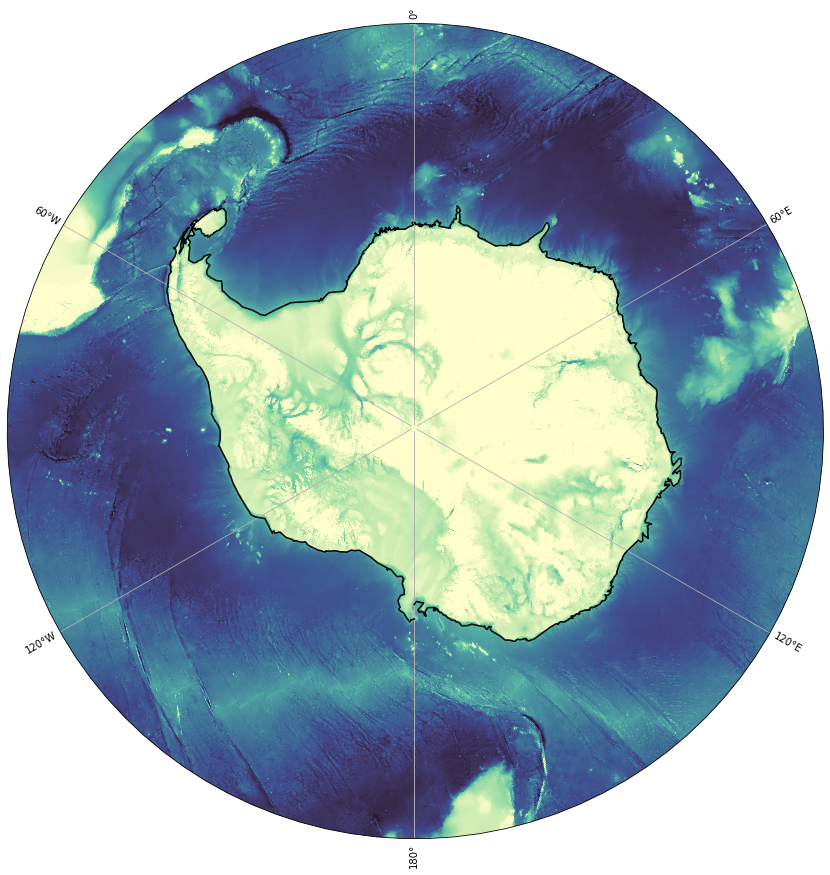

In [32]:
fig, ax = prepare_plot()
cm1 = ax.pcolormesh(IBCSO['lon'][::10], 
                    IBCSO['lat'][::5],
                    IBCSO['z'][::5,::10], 
                    transform=ccrs.PlateCarree(), vmin=-6000, vmax=0, cmap=cmocean.cm.deep_r);

ax.plot(x_iso1, y_iso1, c='k', zorder=4, transform=ccrs.PlateCarree())
ax.plot(x_iso2, y_iso2, c='k', zorder=4, transform=ccrs.PlateCarree())

# CB = fig.colorbar(cm1, ax=ax, fraction=0.04)
# CB.add_lines(cont1)

In [21]:
# Save polygon to disc
with open('/home/users/birgal/data/IBCSO_isobath_2000m_polygon', "wb") as poly_file:
    pickle.dump(isobath_2000m, poly_file, pickle.HIGHEST_PROTOCOL)

In [22]:
# Load polygon from disc
with open('/home/users/birgal/data/IBCSO_isobath_2000m_polygon', "rb") as poly_file:
    isobath_2000m_polygon = pickle.load(poly_file)

In [24]:
x_IBCSO, y_IBCSO = np.meshgrid(IBCSO['lon'], IBCSO['lat'])

x_test = x_IBCSO[::100,::100].flatten()
y_test = y_IBCSO[::100,::100].flatten()

# test_coords = np.array(list(zip(x_test,y_test)))

In [33]:
# test whether point is within the isobath:
utm_isobath.contains(transform(project, Point(100, -73)))

True

In [29]:
# Use multiple processors to create array of points within and outside of domain.

# transform  points from polygon into x,y coordinates, so that the .contains method works properly.
wgs84 = pyproj.CRS('EPSG:4326')
utm = pyproj.CRS('EPSG:32618')

# from lat lon to UTM
project       = pyproj.Transformer.from_crs(wgs84, utm, always_xy=True).transform
utm_isobath   = transform(project, isobath_2000m)

# # and back to lat lon
# project_back  = pyproj.Transformer.from_crs(utm, wgs84, always_xy=True).transform
# polar_isobath = transform(project_back, utm_isobath)

def check_contain(L, x_points, y_points):  # the managed list `L` passed explicitly.
    # Function takes x_points array of longitude values and y_points array of latitudes, and checks whether the coordinate 
    # pairs fall within the 2000 m Anarctic isobath 

    # Make coordinate pairs
    coords = np.array(list(zip(x_points, y_points)))

    # Create a mask where true is points within the 2000 m isobath, and false is outside of the isobath
    contains  = np.vectorize(lambda p: utm_isobath.contains(transform(project, Point(p))), signature='(n)->()')

    # Write booleans to a list that is shared between processes
    L.append(list(contains(coords)))

n_chunks=10
if __name__ == "__main__":
    with Manager() as manager:
        L = manager.list()  # <-- list can be shared between processes.
        processes = []
            
        i_start=0; i_end=0;
        for i in range(n_chunks):
            i_end += x_test.shape[0]/n_chunks
            p = Process(target=check_contain, args=(L, x_test[int(i_start):int(i_end)],
                                                       y_test[int(i_start):int(i_end)]))  # Pass a list of lat lon points to test
            i_start += x_test.shape[0]/n_chunks
            p.start()
            processes.append(p)
            
        for p in processes:
            p.join()
    
        boolean_array = np.array(L, dtype='object')

    # Convert to a more manageable numpy array format. I'm sure there's a better way to write the shared processes to an array instead 
    # of a list to avoid this step, but I don't immediately know it...
    boolean_array_total = boolean_array[0]
    for i in range(1,n_chunks):
        boolean_array_total = boolean_array_total + boolean_array[i]
    
    np_boolean = np.array(boolean_array_total)

In [52]:
n_chunks=16

In [53]:
# Try to use multiple processors to create array of points within and outside of domain.

def check_contain(L, x_points, y_points):  # the managed list `L` passed explicitly.
    points = np.array(list(zip(x_points, y_points)))

    # Create a mask where true is points within the 2000 m isobath, and false is outside of the isobath
    contains  = np.vectorize(lambda p: utm_isobath.contains(transform(project, Point(p))), signature='(n)->()')

    L.append(list(contains(points)))

if __name__ == "__main__":
    with Manager() as manager:
        L = manager.list()  # <-- list can be shared between processes.
        processes = []
        
        i_start=0; i_end=0;
        for i in range(n_chunks):
            i_end += x_test.shape[0]/n_chunks
            p = Process(target=check_contain, args=(L, x_test[int(i_start):int(i_end)], y_test[int(i_start):int(i_end)]))  # Passing the list
            i_start += x_test.shape[0]/n_chunks
            p.start()
            processes.append(p)
        for p in processes:
            p.join()

        boolean_array = np.array(L, dtype='object')

In [54]:
boolean_array_total = boolean_array[0]
for i in range(1,n_chunks):
    boolean_array_total = boolean_array_total + boolean_array[i]

np_boolean = np.array(boolean_array_total)

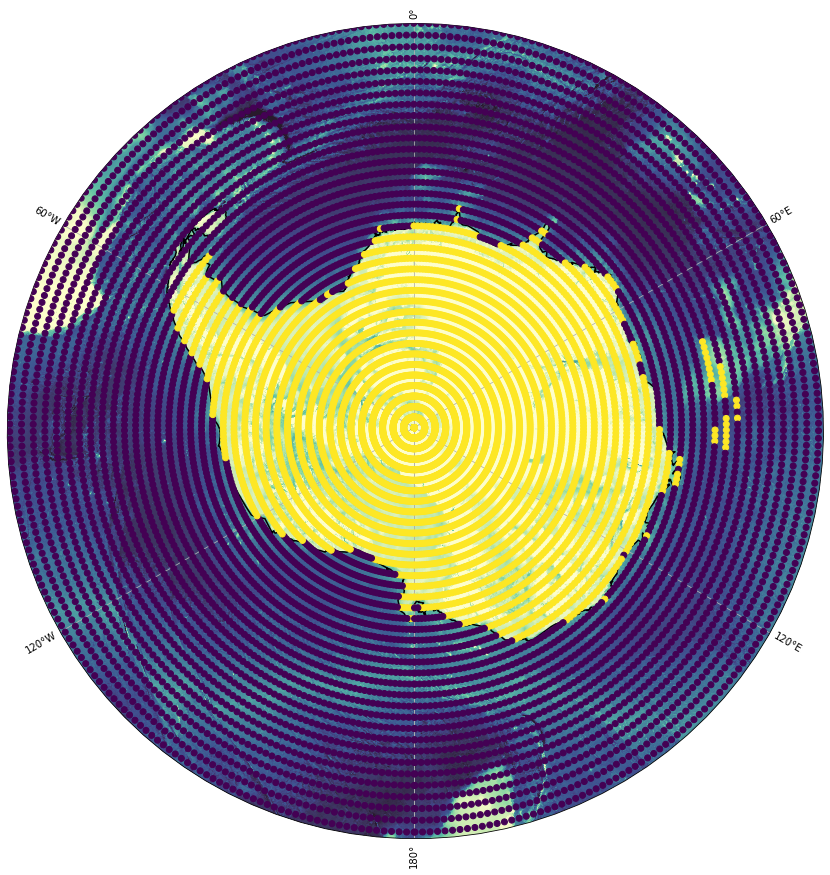

In [55]:
fig, ax = prepare_plot()
cm1 = ax.pcolormesh(IBCSO['lon'][::10], 
                    IBCSO['lat'][::5],
                    IBCSO['z'][::5,::10], 
                    transform=ccrs.PlateCarree(), vmin=-6000, vmax=0, cmap=cmocean.cm.deep_r);

ax.plot(x_iso1, y_iso1, c='k', zorder=4, transform=ccrs.PlateCarree())
ax.plot(x_iso2, y_iso2, c='k', zorder=4, transform=ccrs.PlateCarree())

ax.scatter(x_test, y_test, c=np_boolean, zorder=4, transform=ccrs.PlateCarree())

# CB = fig.colorbar(cm1, ax=ax, fraction=0.04)
# CB.add_lines(cont1)

Method seems to work correctly